# Results for TSMCN-5-L-229 with SNR=inf. Noise added test data is analyzed after experimental classification

In [1]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator
import numpy as np
from numpy import asarray
import pandas as pd
import math
import seaborn as sns  #heat map
import glob # batch processing of images


import matplotlib.font_manager as fm
import random
import sys
import os

from sklearn.datasets import make_regression
# import tensorflow as tf
from sklearn.metrics import confusion_matrix    #confusion matrix
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
# print(font_names)

from scipy import signal
from scipy import interpolate




from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF

#Sklearn model saving and loading
from joblib import dump, load

if '../../' not in sys.path:
    sys.path.append('../../')

from aimos.spectral_datasets.THz_datasets import THz_data

from aimos.misc.utils import simple_plotter





In [2]:
from oneida import THz_mixture_data
from oneida_utils import concentrations_to_one_hot_encode, create_mixture_names

2022-11-11 00:24:12.799958: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-11 00:24:12.942040: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-11 00:24:12.946303: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2022-11-11 00:24:12.946316: I tensorflow/stream_execu

In [3]:
# load experiments


In [5]:
def exp_spectrum_fig(frequencies, absorbances, title):
    plt.figure(figsize=(16,10), dpi=150)
    spectrum_plot = plt.plot(frequencies, absorbances/max(absorbances), linewidth = 0.7, color = 'black')
    plt.xlabel('Frequency ($cm^{-1}$)', fontsize='large')
    plt.ylabel('Norm. Abs.', fontsize='large')
#     plt.title(title, fontsize='large')
    plt.xlim([frequencies[0], frequencies[-1]])
    
    plt.savefig(r'RESULTS/data_analytics/' + experiment + '.png', bbox_inches='tight')
    
    
    return spectrum_plot

In [4]:

exps = ['2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Mix 50% Dilute CM-ACN.xlsx',
'2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Pure Mix CM-ACN.xlsx',
'2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Mix 90% Dilute CM-ACN.xlsx',
'3 Comp-mix_ 90+% CH3OH + 5-% CH3CN + 5-% CH3CL/0.9 CH3OH + 0.05 CH3CN + 0.05 CH3Cl - 1.xlsx',
'3 Comp-mix_ 90+% CH3OH + 5-% CH3CN + 5-% CH3CL/0.9 CH3OH + 0.05 CH3CN + 0.05 CH3Cl - 2.xlsx',
'4 Comp-mix_ 67% CH3OH + 30% CH3CHO + 2% CH3Cl + 1% CH3CN/0.67 CH3OH + 0.3 CH3CHO + 0.02 CH3Cl + 0.01 CH3CN - v2.xlsx',
]

exp_path = '../../data/Mixture_exp_data/'
exp_filepath = '4 Comp-mix_ 67% CH3OH + 30% CH3CHO + 2% CH3Cl + 1% CH3CN/0.67 CH3OH + 0.3 CH3CHO + 0.02 CH3Cl + 0.01 CH3CN - v2.xlsx'


# def classify_exp(exp_path,exp_filepath,mixture_types):

    
    
    

Experiment name:  2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Mix 50% Dilute CM-ACN.xlsx
Experiment name:  2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Pure Mix CM-ACN.xlsx
Experiment name:  2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Mix 90% Dilute CM-ACN.xlsx
Experiment name:  3 Comp-mix_ 90+% CH3OH + 5-% CH3CN + 5-% CH3CL/0.9 CH3OH + 0.05 CH3CN + 0.05 CH3Cl - 1.xlsx
Experiment name:  3 Comp-mix_ 90+% CH3OH + 5-% CH3CN + 5-% CH3CL/0.9 CH3OH + 0.05 CH3CN + 0.05 CH3Cl - 2.xlsx
Experiment name:  4 Comp-mix_ 67% CH3OH + 30% CH3CHO + 2% CH3Cl + 1% CH3CN/0.67 CH3OH + 0.3 CH3CHO + 0.02 CH3Cl + 0.01 CH3CN - v2.xlsx


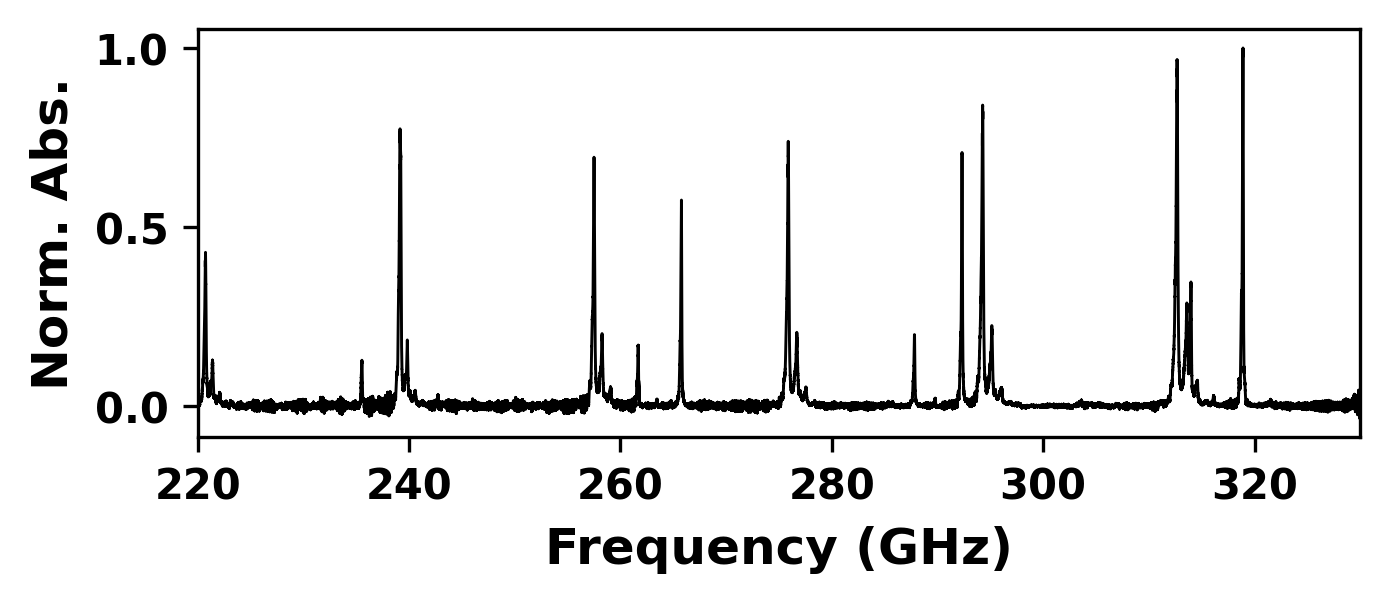

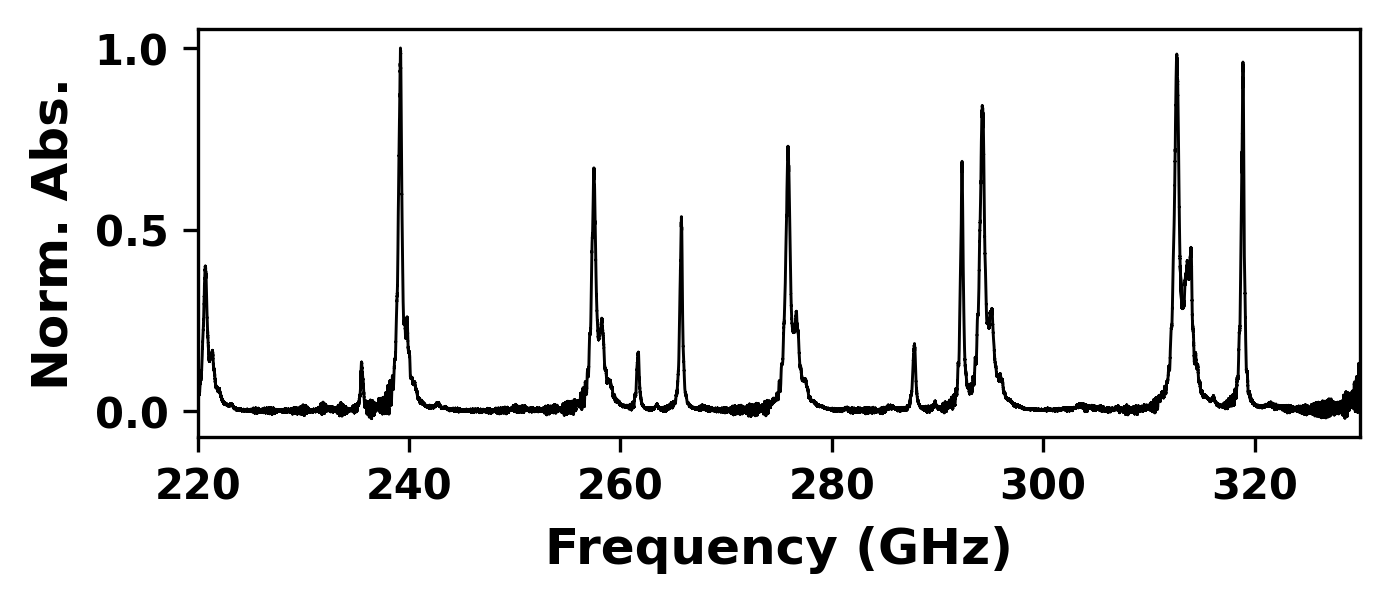

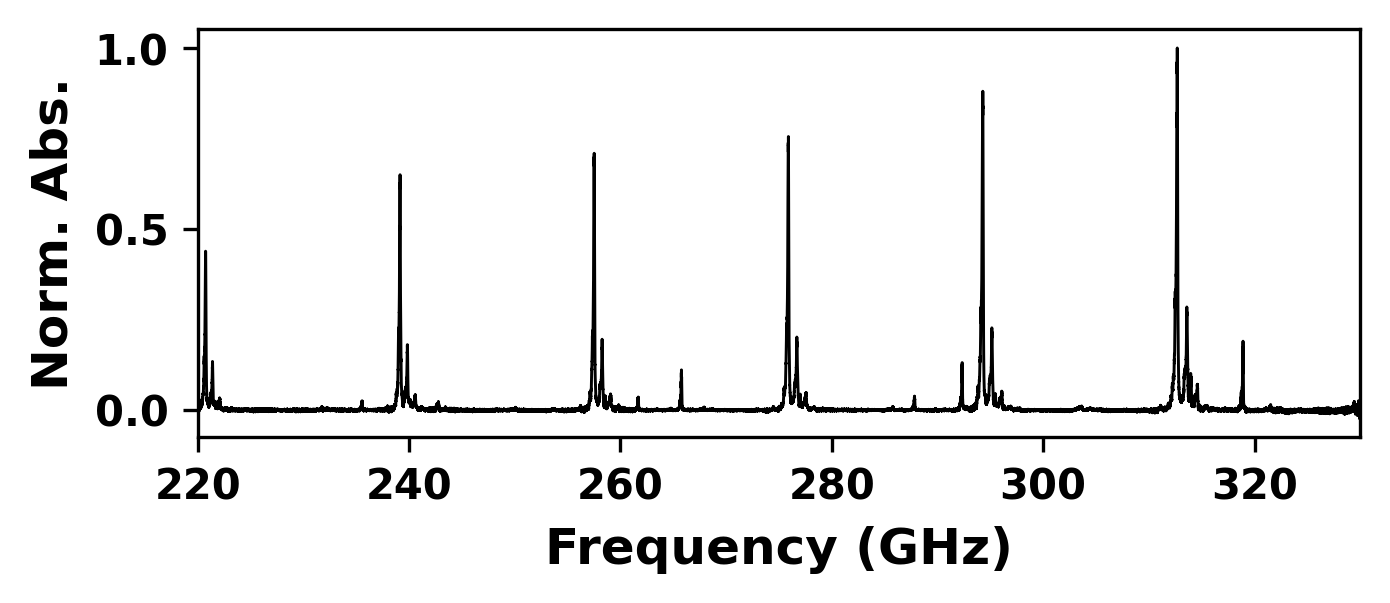

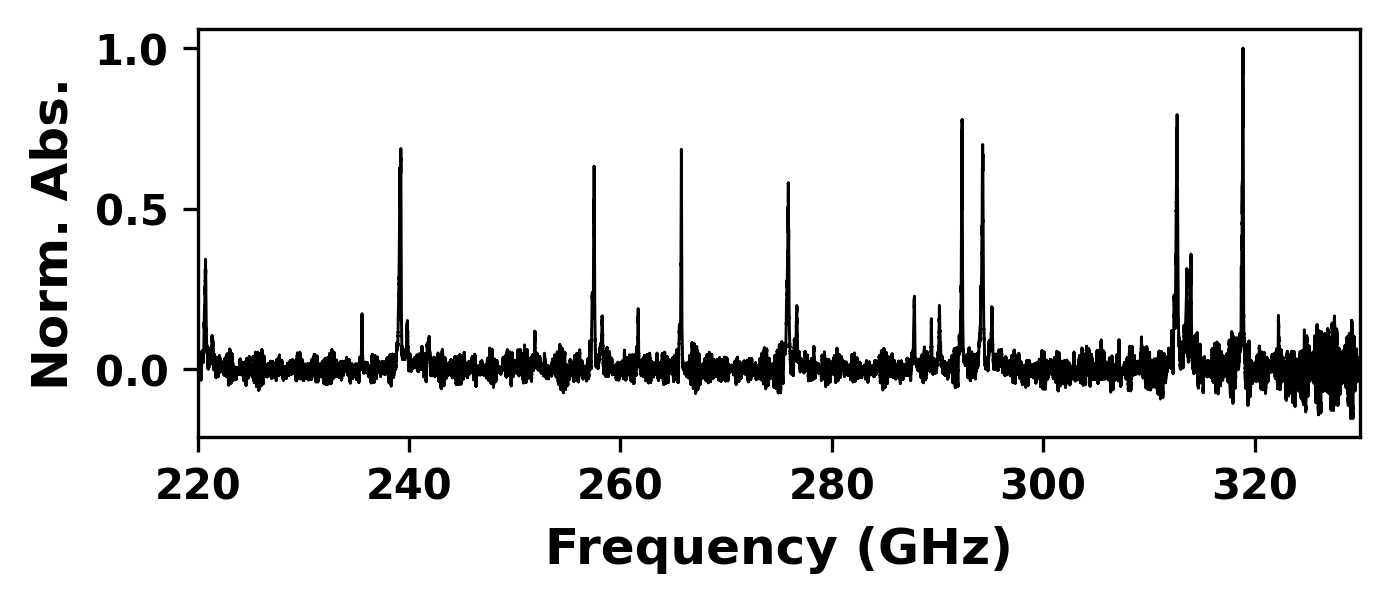

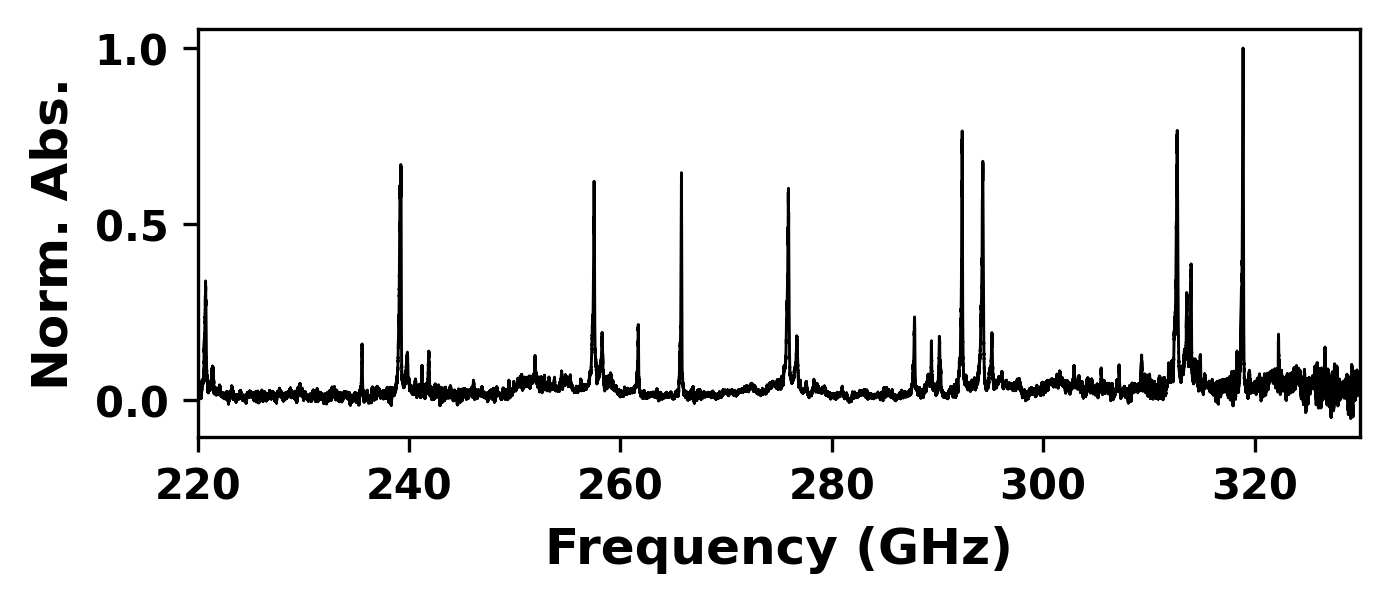

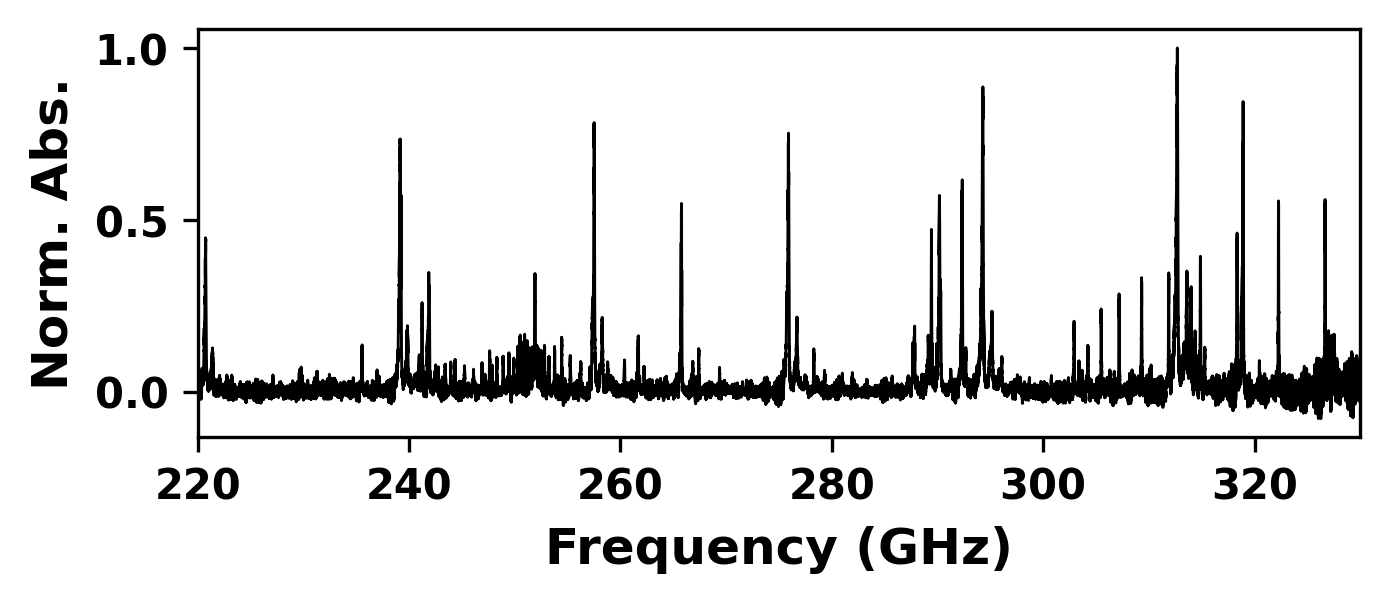

In [5]:
idx = 0
for experiment in exps:
    df_exp1 = pd.read_excel(exp_path + experiment)


    freq_exp1 = df_exp1[df_exp1.columns[0]].to_numpy()
    abs_exp1 = df_exp1[df_exp1.columns[1]].to_numpy()

#     exp_spectrum_fig(freq_exp1, abs_exp1, experiment)
    
    frequencies = freq_exp1
    absorbances = abs_exp1
    plt.rc('font', weight='bold')
    
#     plt.figure(figsize=(16,5), dpi=300)
    plt.figure(figsize=(5,1.8), dpi=300)
    spectrum_plot = plt.plot(frequencies, absorbances/max(absorbances), linewidth = 0.7, color = 'black')
    plt.xlabel('Frequency (GHz)', fontsize='large', fontweight = 'bold')
    plt.ylabel('Norm. Abs.', fontsize='large', fontweight='bold')
#     plt.title(experiment, fontsize='large')
    plt.xlim([frequencies[0], frequencies[-1]])
    
    plt.savefig(r'RESULTS/data_analytics/'+'exp' + str(idx) + '.png', bbox_inches='tight')
#     plt.savefig(r'RESULTS/data_analytics/'+'exp' + str(idx) + '_square.png', bbox_inches='tight')
    
    print('Experiment name: ',experiment)
    idx+=1
    

In [44]:
# TO-DO
# document experimental results
# distribution of 1,2,3,4,5 component mixtures
# grad cam on val, test and exps
# precision-recall curve (conventional), may need to add sklearn metrics to tensorflow model via metrics argument see tutorial for imbalanced dataset
# concentration wise how many was correctly classified
# keras tuning and redo whole

In [9]:
freq_exp1

array([220.        , 220.00063511, 220.00127021, ..., 329.99872914,
       329.99936457, 330.        ])

In [76]:
# # df_exp1 = pd.read_excel('../../data/Mixture_exp_data/2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Mix 50% Dilute CM-ACN.xlsx')
# # df_exp1 = pd.read_excel('../../data/Mixture_exp_data/2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Pure Mix CM-ACN.xlsx')
# # df_exp1 = pd.read_excel('../../data/Mixture_exp_data/2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Mix 90% Dilute CM-ACN.xlsx')
# # df_exp1 = pd.read_excel('../../data/Mixture_exp_data/3 Comp-mix_ 90+% CH3OH + 5-% CH3CN + 5-% CH3CL/0.9 CH3OH + 0.05 CH3CN + 0.05 CH3Cl - 1.xlsx')
# # df_exp1 = pd.read_excel('../../data/Mixture_exp_data/3 Comp-mix_ 90+% CH3OH + 5-% CH3CN + 5-% CH3CL/0.9 CH3OH + 0.05 CH3CN + 0.05 CH3Cl - 2.xlsx')
# df_exp1 = pd.read_excel('../../data/Mixture_exp_data/4 Comp-mix_ 67% CH3OH + 30% CH3CHO + 2% CH3Cl + 1% CH3CN/0.67 CH3OH + 0.3 CH3CHO + 0.02 CH3Cl + 0.01 CH3CN - v2.xlsx')
# freq_exp1 = df_exp1['Freq [GHz]'].to_numpy()
# abs_exp1 = df_exp1['Aavg'].to_numpy()
# # abs_exp1 = df_exp1['Abs'].to_numpy()


In [11]:
# exp_spectrum_fig(freq_exp1,abs_exp1)

Experiment name:  1 comp/Methanol 1 Torr WDL 8.csv
Experiment name:  1 comp/Formic Acid 1 Torr WDL 5 Notch Shift.csv
Experiment name:  1 comp/Acetaldehyde 1 Torr WDL 6 Notch.csv
Experiment name:  1 comp/1-Sweep CH3Cl 220-330-1 Torr.csv
Experiment name:  1 comp/1-Sweep 0p5 Torr-CH3CN.csv


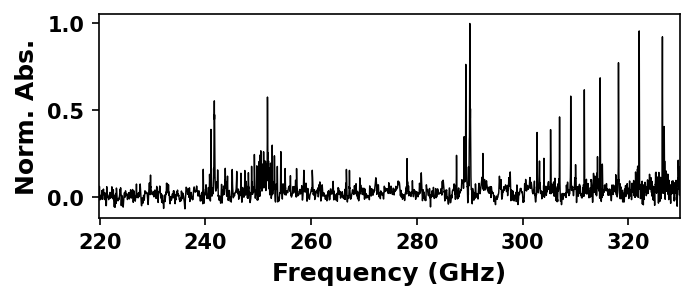

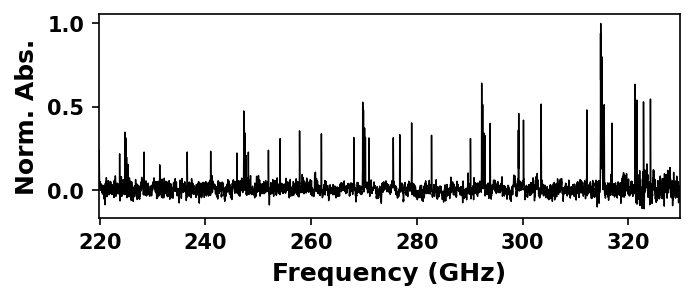

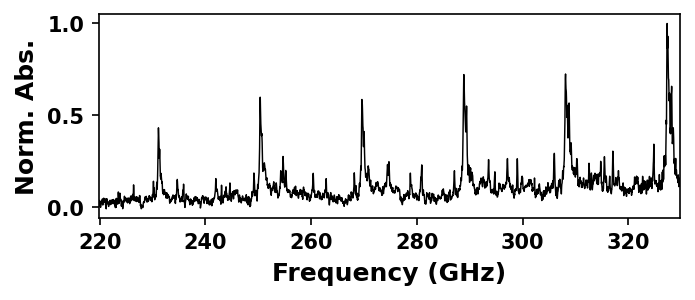

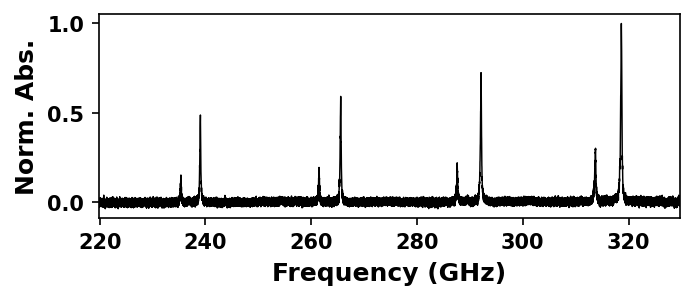

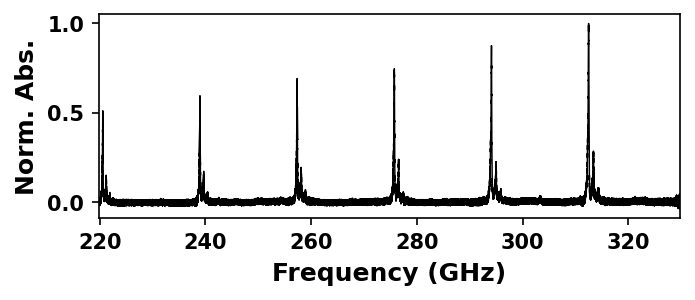

In [6]:


exps = [
       '1 comp/Methanol 1 Torr WDL 8.csv',
       '1 comp/Formic Acid 1 Torr WDL 5 Notch Shift.csv',
       '1 comp/Acetaldehyde 1 Torr WDL 6 Notch.csv',
       
       
       '1 comp/1-Sweep CH3Cl 220-330-1 Torr.csv',
       
       '1 comp/1-Sweep 0p5 Torr-CH3CN.csv']

true_label=[112,248,0,80,64]
exp_path = '../../data/Mixture_exp_data/'
exp_filepath = '4 Comp-mix_ 67% CH3OH + 30% CH3CHO + 2% CH3Cl + 1% CH3CN/0.67 CH3OH + 0.3 CH3CHO + 0.02 CH3Cl + 0.01 CH3CN - v2.xlsx'


idx = 0 
for experiment in exps:
    df_exp1 = pd.read_csv(exp_path + experiment)


    freq_exp1 = df_exp1[df_exp1.columns[0]].to_numpy()
    abs_exp1 = df_exp1[df_exp1.columns[1]].to_numpy()

#     exp_spectrum_fig(freq_exp1, abs_exp1, experiment)
    
    frequencies = 29.9792458*freq_exp1
    absorbances = abs_exp1
    
    plt.rc('font', weight='bold')
    
#     plt.figure(figsize=(16,5), dpi=150)
    plt.figure(figsize=(5,1.8), dpi=150)
    spectrum_plot = plt.plot(frequencies, absorbances/max(absorbances), linewidth = 0.7, color = 'black')
    plt.xlabel('Frequency (GHz)', fontsize='large', fontweight = 'bold')
    plt.ylabel('Norm. Abs.', fontsize='large', fontweight = 'bold')
#     plt.title(experiment, fontsize='large')
    plt.xlim([frequencies[0], frequencies[-1]])
    
    plt.savefig(r'RESULTS/data_analytics/'+'pure_exp' + str(idx) + '.png', bbox_inches='tight')
#     plt.savefig(r'RESULTS/data_analytics/'+'pure_exp' + str(idx) + '_square.png', bbox_inches='tight')
    
    print('Experiment name: ',experiment)
    idx+=1